# stop-to-stop segments

In [1]:
import dask.dataframe as dd
import dask_geopandas as dg
import geopandas as gpd
import pandas as pd

from update_vars import SEGMENT_GCS, COMPILED_CACHED_VIEWS, analysis_date

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = dg.read_parquet(
    f"{SEGMENT_GCS}stop_segments_{analysis_date}"
)

routelines = gpd.read_parquet(
    f"{COMPILED_CACHED_VIEWS}routelines_{analysis_date}.parquet")

all_shapes = df.shape_array_key.unique().compute().tolist()

In [3]:
import random

test_shapes = random.sample(all_shapes, 10)

In [4]:
for i in test_shapes:
    print(f"shape_array_key: {i}")
    
    TILES = "CartoDB Positron"
    
    orig = (routelines[routelines.shape_array_key==i]
            .explore(tiles=TILES)
           )
          
    gdf = df[df.shape_array_key==i].compute()
    
    segmented = gdf.explore("segment_sequence", tiles=TILES)
    
    display(orig)
    display(segmented)
          


shape_array_key: 61a57f3aba324b849a4c18218255dc6f


shape_array_key: 4593ccb8545df312e99936dc251cf54c


shape_array_key: 4d1c3bfd1cd921f6786d2276e9d7b991


shape_array_key: ad5996dc2da2e739bb92176e86b471bc


shape_array_key: 56ae96d01379dcda58ed97d0d8adf8eb


shape_array_key: fc82d0cc329f2cb9eed8e960d163f298


shape_array_key: 9e25c0e019877223d2b957d241f53f9c


shape_array_key: 00fffd0d352c254044d7aefe8d1c887f


shape_array_key: b6260219e03276b955bf41b6ba95f101


shape_array_key: 3989e9b8940884f6857edf9716778a49


In [5]:
debug_me = "56ae96d01379dcda58ed97d0d8adf8eb"

In [6]:
stops_projected = gpd.read_parquet(
    f"./data/stops_projected.parquet",
    filters = [["shape_array_key", "==", debug_me]]
)

In [8]:
stops = gpd.read_parquet(f"./data/stops.parquet")

In [13]:
test_geom = stops_projected.shape_geometry.iloc[0]

In [15]:
import shapely

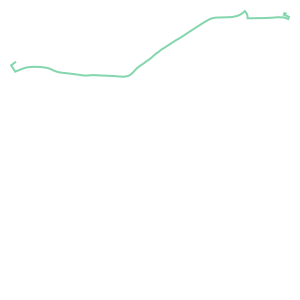

In [20]:
test_geom

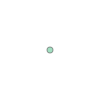

In [21]:
shapely.geometry.Point(test_geom.coords[0])

In [10]:
stops_projected.shape_id.unique()

array(['p_786698'], dtype=object)

In [7]:
stops_projected.head()

,feed_key,stop_id,stop_name,geometry,stop_sequence,shape_id,shape_array_key,shape_geometry,shape_meters
139682,b1d9c45c22397c2873483e50344107a8,2554968,Yard,POINT (-202703.466 1293.122),1,p_786698,56ae96d01379dcda58ed97d0d8adf8eb,"LINESTRING (-202700.231 1288.736, -202729.519 ...",0.049054
139683,b1d9c45c22397c2873483e50344107a8,25501,Hercules Transit Center,POINT (-198688.265 1978.366),2,p_786698,56ae96d01379dcda58ed97d0d8adf8eb,"LINESTRING (-202700.231 1288.736, -202729.519 ...",4717.699270
